## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

## Reading Data

In [ ]:
data = pd.read_csv('/content/sample_data/fraud_detection.csv')

In [ ]:
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


### Obtaining data info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5462553 entries, 0 to 5462552
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 458.4+ MB


In [ ]:
data.shape

(5462553, 11)

## Data Cleaning

### Checking for missing values

<Axes: >

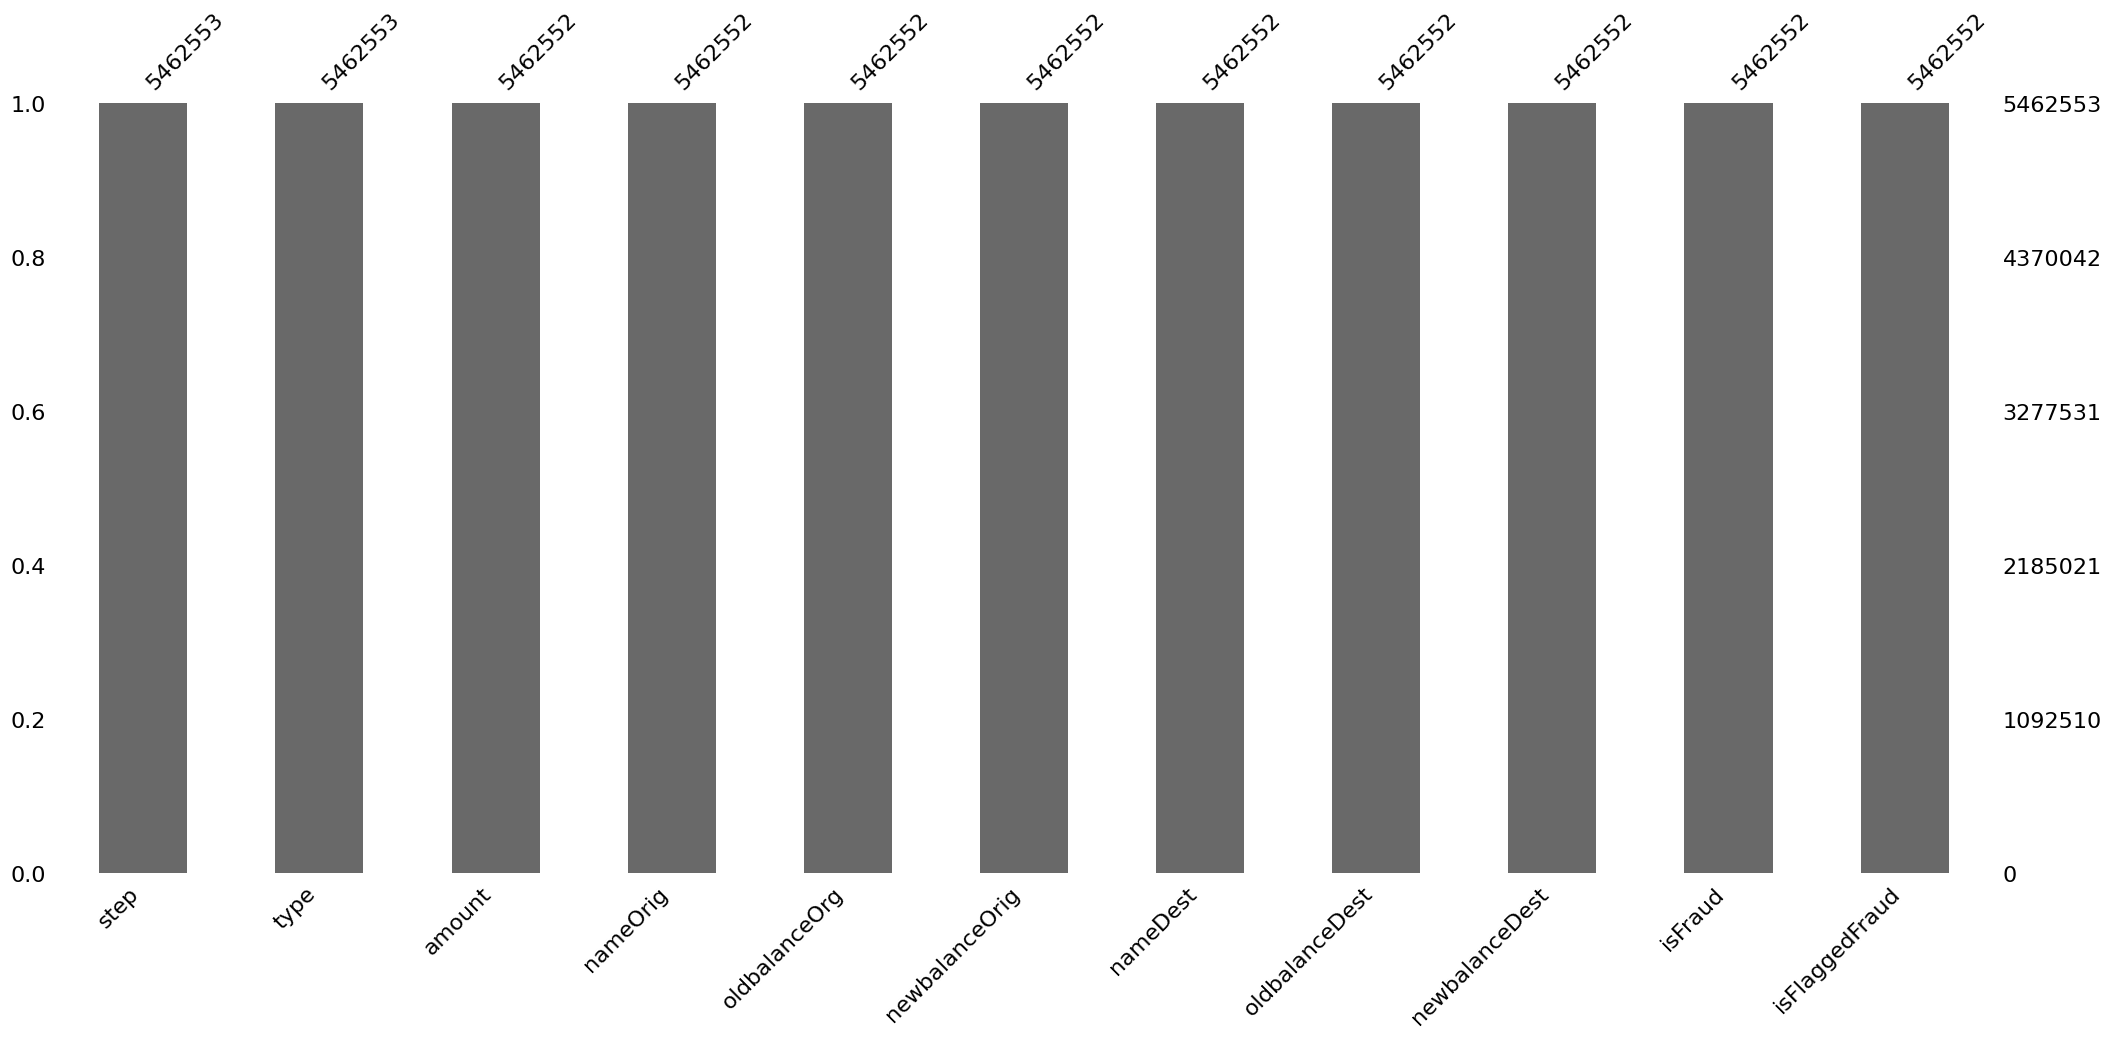

In [ ]:
msno.bar(data)

#### All columns show 100% completed data records!

### Number of duplicates in data

In [ ]:
data.duplicated().sum()

0

### Renaming columns

In [ ]:
data = data.rename(columns = {'nameOrig':'origin', 'oldbalanceOrg':'sender_old_bal', 'newbalanceOrig':'sender_new_bal', 'nameDest':'dest', 'oldbalanceDest':'dest_old_bal', 'newbalanceDest':'dest_new_bal'})

### Removing non-essential columns

In [ ]:
data = data.drop(columns = ['step', 'isFlaggedFraud'], axis='columns')

### Viewing modified data

In [ ]:
data.head()

,type,amount,origin,sender_old_bal,sender_new_bal,dest,dest_old_bal,dest_new_bal,isFraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


## Data Analysis

### Visualizing fraud occurances

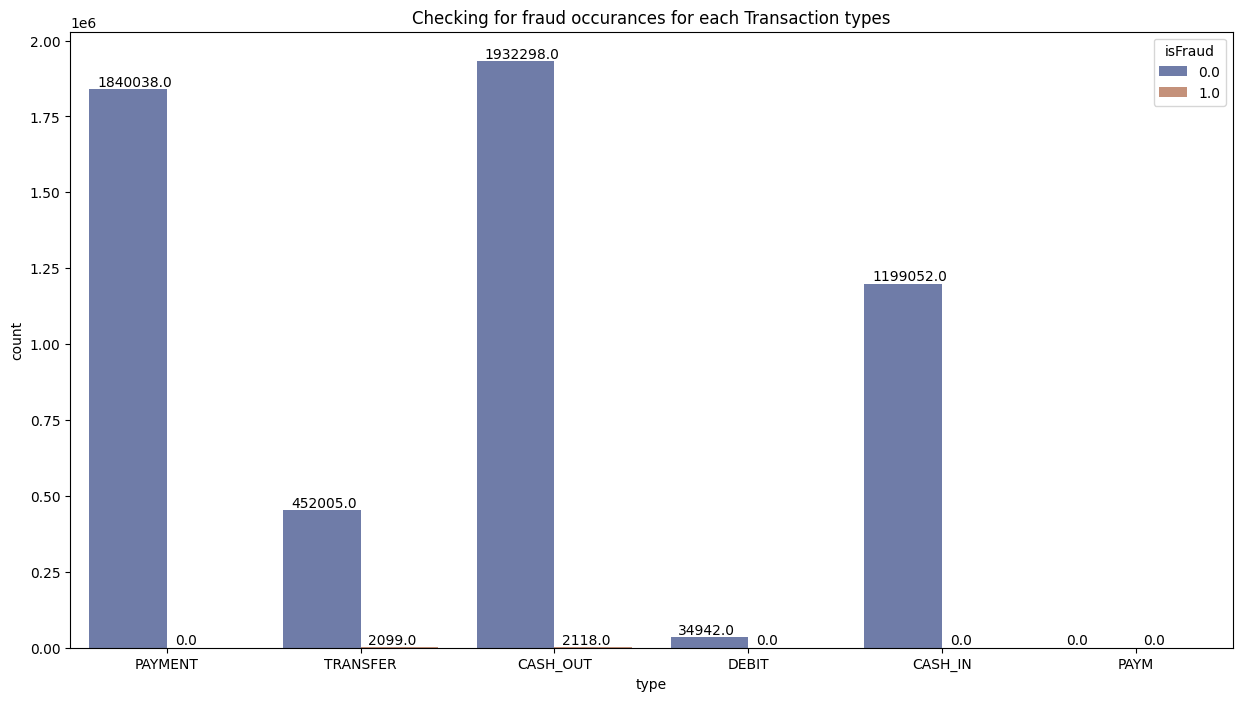

In [ ]:
plt.figure(figsize=(15,8))
g = sns.countplot(data=data, x='type', hue='isFraud', palette='dark',alpha=0.6)
plt.title("Checking for fraud occurances for each Transaction types")

#finding counts
for p in g.patches:
    g.annotate(p.get_height(), (p.get_x()+0.04, p.get_height()+10000))

### Accounts involved in fraud transactions

#### Checking origin accounts (and if same account has been used for multiple fraudulent transactions)

##### For type 'Transfer'

In [ ]:
transfer_fraud = data[(data['type']=='TRANSFER') & (data['isFraud']==1)]

In [ ]:
transfer_fraud['origin'].value_counts()

C1305486145    1
C1100582606    1
C2099141021    1
C395312314     1
C1442710040    1
              ..
C1049419908    1
C562878740     1
C1265971736    1
C117760847     1
C1500954135    1
Name: origin, Length: 2099, dtype: int64

##### For type 'CashOut'

In [ ]:
cashOut_fraud = data[(data['type']=='CASH_OUT') & (data['isFraud']==1)]

In [ ]:
cashOut_fraud['origin'].value_counts()

C840083671     1
C1171108615    1
C37928805      1
C1263272342    1
C1207384939    1
              ..
C1498577424    1
C1700746062    1
C248036406     1
C1592208539    1
C2031058034    1
Name: origin, Length: 2118, dtype: int64

#### Checking destination accounts (and if same account has been used for multiple fraudulent transactions)

##### For type 'Transfer'

In [ ]:
transfer_fraud['dest'].value_counts()

C553264065     1
C1147517658    1
C1733297456    1
C554878096     1
C1844625482    1
              ..
C713376763     1
C270375529     1
C806590394     1
C578681858     1
C1753438531    1
Name: dest, Length: 2099, dtype: int64

##### For type 'CashOut'

In [ ]:
cashOut_fraud['dest'].value_counts()

C2020337583    2
C1497532505    2
C803116137     2
C1981613973    2
C105660024     2
              ..
C1404789740    1
C112858734     1
C1506005745    1
C1451093652    1
C413925568     1
Name: dest, Length: 2104, dtype: int64

### Checking if transfer destination account used for cashing out (for fraud cases)

In [ ]:
transfer_fraud.dest.isin(cashOut_fraud.origin).any()

False

In [ ]:
trans_cashout = data[data['type']=='TRANSFER']

In [ ]:
transfer_fraud.dest.isin(trans_cashout.origin).any()

False

In [ ]:
transfer_fraud.dest.isin(trans_cashout.origin).count()

2099

### Insights

<ul>
    <li>Fraud Transactions are seen only for 'TRANSFER' (4097 occurances) and 'CASH_OUT' (4116 occurances) types</li>
    <li>Fraud tranasactions are usually to and from customers</li>
    <li>Recipient accounts fraud 'TRANSFER' cases were -</li>
    <ul>
        <li>not involved in any fraudulent cash withdrawals</li>
        <li>4097 times used to make valid cash withdrawals</li>
    </ul>
</ul>

## Feature Engineering

### Creating new column client_type having 4 categories and dropping 'origin' and 'dest'

<ul>
    <li>CC - Customer to Customer</li>
    <li>CM - Customer to Merchant</li>
    <li>MC - Merchant to Customer</li>
    <li>MM - Merchant to Merchant</li>
</ul>

#### Adding 'client_type' column

In [ ]:
data['client_type'] = np.nan
data.loc[data.origin.str.contains('C') & data.dest.str.contains('C'), 'client_type'] = 'CC'
data.loc[data.origin.str.contains('C') & data.dest.str.contains('M'), 'client_type'] = 'CM'
data.loc[data.origin.str.contains('M') & data.dest.str.contains('C'), 'client_type'] = 'MC'
data.loc[data.origin.str.contains('M') & data.dest.str.contains('M'), 'client_type'] = 'MM'

#### Dropping 'origin' and 'dest'

In [ ]:
data.drop(columns = ['origin', 'dest'], axis = 'columns', inplace = True)

In [ ]:
data.head()

,type,amount,sender_old_bal,sender_new_bal,dest_old_bal,dest_new_bal,isFraud,client_type
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0,CM
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0,CM
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0,CC
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0,CC
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0,CM


## Data Visualization

### Obtaining number of fraud transactions and valid transactions of each 'client_type'

In [ ]:
fraudTrans = data[data['isFraud'] == 1]
validTrans = data[data['isFraud'] == 0]

In [ ]:
fr = fraudTrans.client_type.value_counts()
print(fr)

CC    4217
Name: client_type, dtype: int64


In [ ]:
va = validTrans.client_type.value_counts()
print(va)

CC    3618297
CM    1840038
Name: client_type, dtype: int64


### Visualizing the fraud and valid transaction counts for each 'client_type'

Text(0.5, 1.0, 'Valid Transactions')

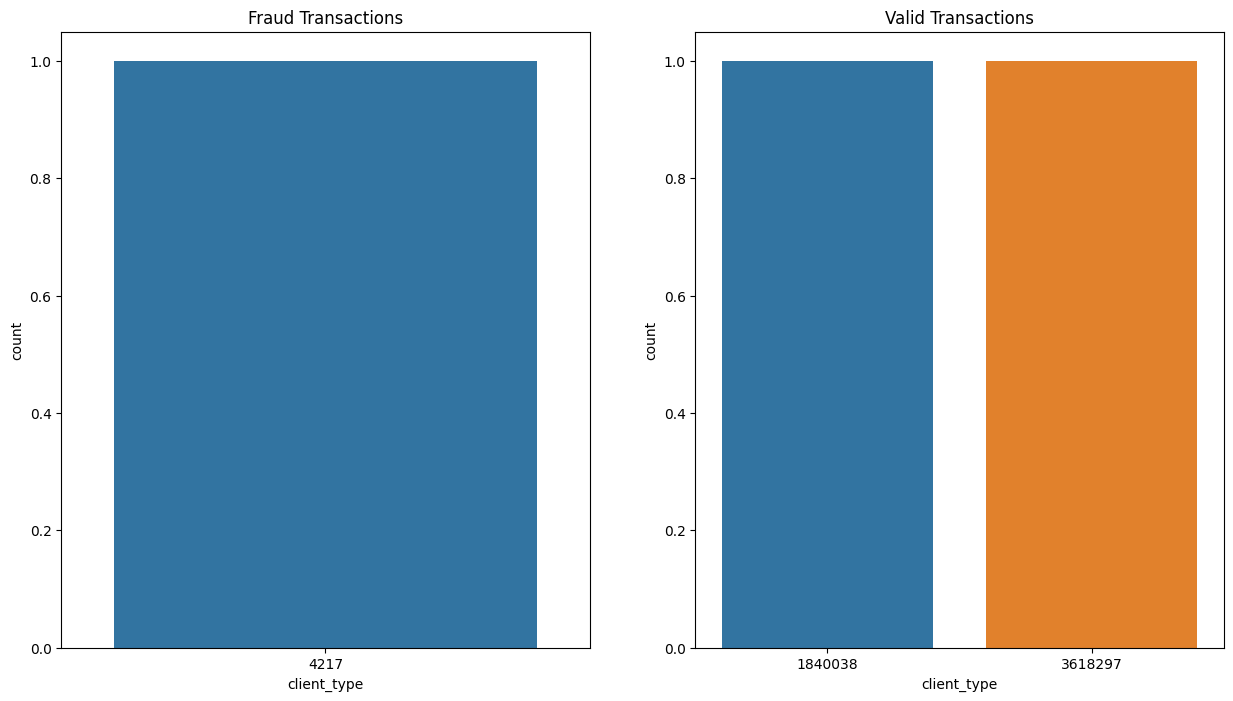

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
ax1 = sns.countplot(x = fr)
plt.title('Fraud Transactions')

plt.subplot(1,2,2)
ax2 = sns.countplot(x = va)
plt.title('Valid Transactions')

### Visualization of transaction counts categorized by their 'type'

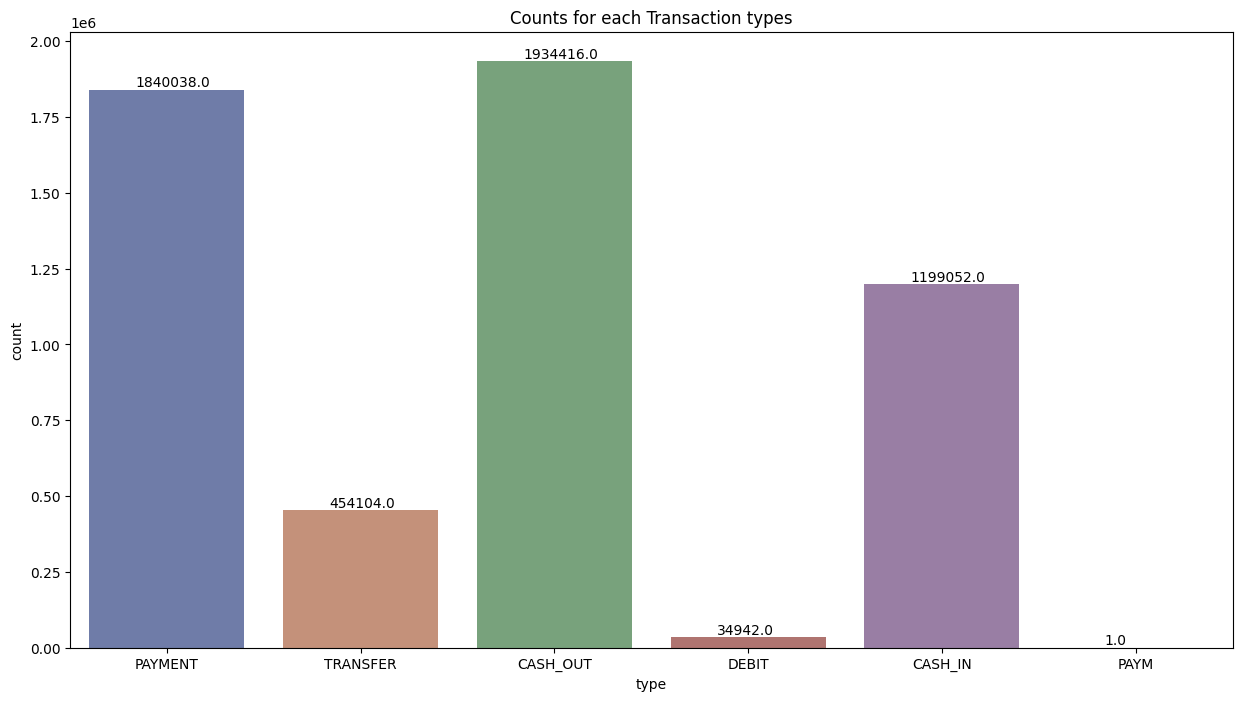

In [ ]:
plt.figure(figsize=(15,8))
g = sns.countplot(data=data, x='type', palette='dark',alpha=0.6)
plt.title("Counts for each Transaction types")

#finding counts
for p in g.patches:
    g.annotate(p.get_height(), (p.get_x()+0.24, p.get_height()+10000))

### Visualization of transaction counts categorized by their 'client_type'

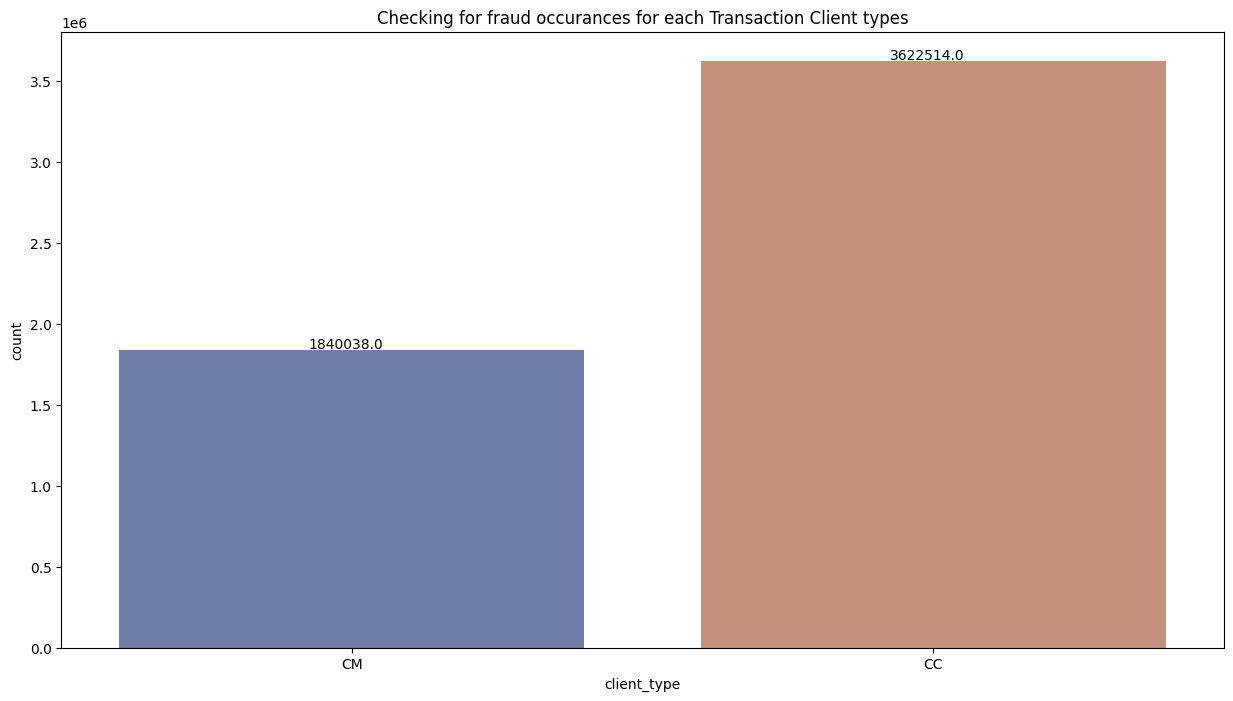

In [ ]:
plt.figure(figsize=(15,8))
g = sns.countplot(data=data, x='client_type', palette='dark',alpha=0.6)
plt.title("Checking for fraud occurances for each Transaction Client types")

#finding counts
for p in g.patches:
    g.annotate(p.get_height(), (p.get_x()+0.325, p.get_height()+10000))

### Visualization of Fraud vs Valid transaction counts categorized by their 'client_type'

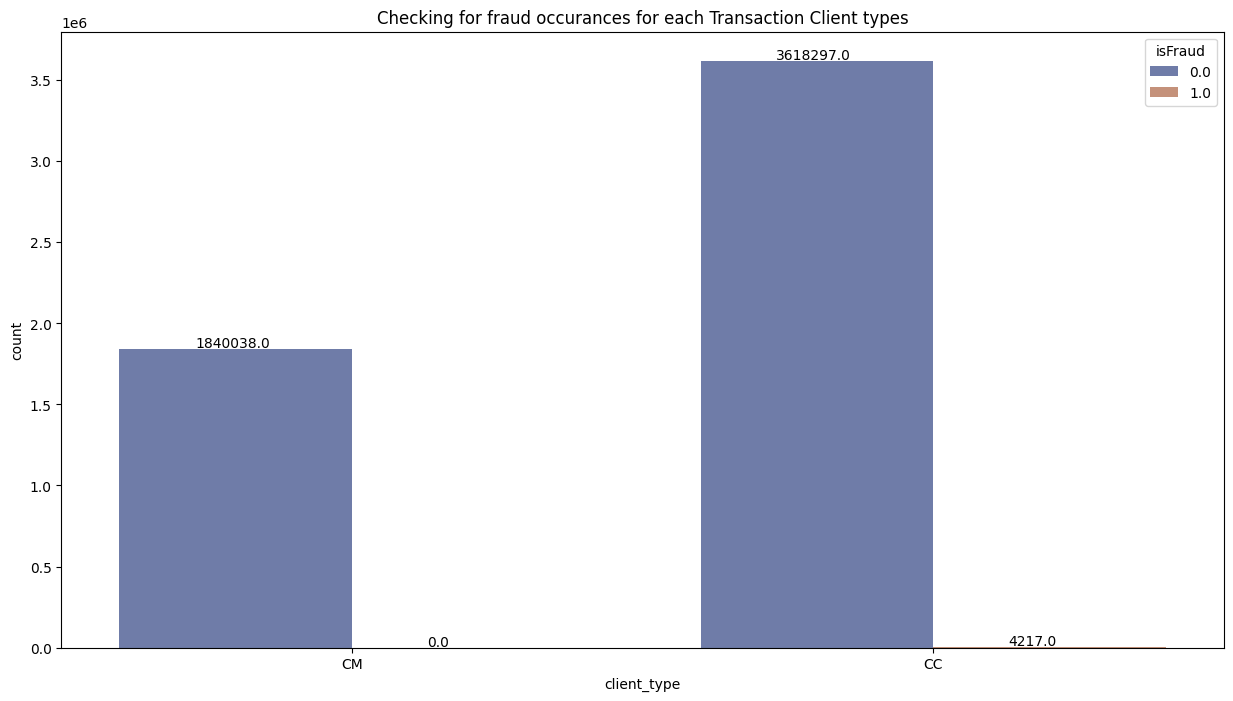

In [ ]:
plt.figure(figsize=(15,8))
g = sns.countplot(data=data, x='client_type', hue='isFraud', palette='dark',alpha=0.6)
plt.title("Checking for fraud occurances for each Transaction Client types")

#finding counts
for p in g.patches:
    g.annotate(p.get_height(), (p.get_x()+0.13, p.get_height()+10000))

## Data Preprocessing

### Importing necessary libraries

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Obtaining one-hot encodings for 'type' column

In [ ]:
one_hot_type = pd.get_dummies(data['type'])

In [ ]:
one_hot_type

,CASH_IN,CASH_OUT,DEBIT,PAYM,PAYMENT,TRANSFER
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,1,0,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
5462548,0,1,0,0,0,0
5462549,0,0,0,0,1,0
5462550,0,0,0,0,1,0
5462551,0,1,0,0,0,0


### Adding one-hot encoding for 'type' and removing 'type' column from data

In [ ]:
data = data.drop('type', axis=1)

In [ ]:
data = data.join(one_hot_type)

In [ ]:
data.head()

,amount,sender_old_bal,sender_new_bal,dest_old_bal,dest_new_bal,isFraud,client_type,CASH_IN,CASH_OUT,DEBIT,PAYM,PAYMENT,TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0.0,CM,0,0,0,0,1,0
1,1864.28,21249.0,19384.72,0.0,0.0,0.0,CM,0,0,0,0,1,0
2,181.00,181.0,0.00,0.0,0.0,1.0,CC,0,0,0,0,0,1
3,181.00,181.0,0.00,21182.0,0.0,1.0,CC,0,1,0,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0.0,CM,0,0,0,0,1,0


### Obtaining one-hot encodings for 'client_type'one_hot_type = pd.get_dummies(data['type']) column

In [ ]:
one_hot_client_type = pd.get_dummies(data['client_type'])

In [ ]:
one_hot_client_type

,CC,CM
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
5462548,1,0
5462549,0,1
5462550,0,1
5462551,1,0


### Adding one-hot encoding for 'client_type' and removing 'client_type' column from data

In [ ]:
data = data.drop('client_type', axis=1)

In [ ]:
data = data.join(one_hot_client_type)

In [ ]:
data.head()

,amount,sender_old_bal,sender_new_bal,dest_old_bal,dest_new_bal,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYM,PAYMENT,TRANSFER,CC,CM
0,9839.64,170136.0,160296.36,0.0,0.0,0.0,0,0,0,0,1,0,0,1
1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0,0,0,0,1,0,0,1
2,181.00,181.0,0.00,0.0,0.0,1.0,0,0,0,0,0,1,1,0
3,181.00,181.0,0.00,21182.0,0.0,1.0,0,1,0,0,0,0,1,0
4,11668.14,41554.0,29885.86,0.0,0.0,0.0,0,0,0,0,1,0,0,1


### Obtaining X and y

In [ ]:
y = data.isFraud.fillna(value = 0)
X = data.drop('isFraud', axis=1).fillna(value = 0)
print("X:")
print(X.head())
print("y:")
print(y.head())

X:
     amount  sender_old_bal  sender_new_bal  dest_old_bal  dest_new_bal  \
0   9839.64        170136.0       160296.36           0.0           0.0   
1   1864.28         21249.0        19384.72           0.0           0.0   
2    181.00           181.0            0.00           0.0           0.0   
3    181.00           181.0            0.00       21182.0           0.0   
4  11668.14         41554.0        29885.86           0.0           0.0   

   CASH_IN  CASH_OUT  DEBIT  PAYM  PAYMENT  TRANSFER  CC  CM  
0        0         0      0     0        1         0   0   1  
1        0         0      0     0        1         0   0   1  
2        0         0      0     0        0         1   1   0  
3        0         1      0     0        0         0   1   0  
4        0         0      0     0        1         0   0   1  
y:
0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: isFraud, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y)

### Normalizing X_train and X-test

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Machine Learning

### Importing necessary libraries

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm.sklearn import LGBMClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import hamming_loss

### Creating list of ML models

In [ ]:
xgbc = xgb.XGBClassifier(max_depth=3, n_jobs=-1, random_state=42, learning_rate=0.1)
rfc = RandomForestClassifier(n_estimators=15, n_jobs=-1, random_state=42)
lgbmc = LGBMClassifier(boosting_type='gbdt', objective='binary', random_sate=8888)
logreg = LogisticRegression(solver='liblinear', random_state=42)

In [ ]:
clsrs = []
clsrs.append(xgbc)
clsrs.append(rfc)
clsrs.append(lgbmc)
clsrs.append(logreg)

### Training ML models

In [ ]:
for clsr in clsrs:
    clsr.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: random_sate
[LightGBM] [Warning] Unknown parameter: random_sate
[LightGBM] [Info] Number of positive: 3163, number of negative: 4093751
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.377951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1298
[LightGBM] [Info] Number of data points in the train set: 4096914, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000772 -> initscore=-7.165696
[LightGBM] [Info] Start training from score -7.165696


### Obtaining prediction and accuracy (hml and auc) calculations

In [ ]:
hml_list = []
auc_list = []

In [ ]:
for clsr in clsrs:
    y_pred = clsr.predict(X_test)
    y_prob = clsr.predict_proba(X_test)[:,-1]
    hml_list.append(hamming_loss(y_test, y_pred))
    auc_list.append(roc_auc_score(y_test, y_prob))

### Creating accuracy dictionaries

In [ ]:
hml_dict = {}
auc_dict = {}
keys = ['XGBoost', 'Random Forest', 'Light GBM', 'LR']

In [ ]:
for i in range(len(keys)):
    key = keys[i]
    hml_dict[key] = hml_list[i]
    auc_dict[key] = auc_list[i]

In [ ]:
hml_dict_s = dict(sorted(hml_dict.items(), key=lambda item: item[1]))
hml_dict_s

In [ ]:
auc_dict_s = dict(sorted(auc_dict.items(), key=lambda item: item[1]))
auc_dict_s

### Plotting AUC accuracy scores (Higher AUC score indicates better result)

In [ ]:
import plotly
plotly.io.renderers.default = 'png'
plotly.io.renderers.default = 'jupyterlab'

In [ ]:
fig = px.bar(x=list(auc_dict_s.keys()), y=list(auc_dict_s.values()), text=np.round(list(auc_dict_s.values()), 6),
            title='Accuracy (AUC) score of each Classifier',color=list(auc_dict_s.keys()),
            color_discrete_sequence=px.colors.sequential.matter)
fig.show()

### Plotting Accuracy (Hamming Loss) scores (Lower score indicates better results)

In [ ]:
fig = px.bar(x=list(hml_dict_s.keys()), y=list(hml_dict_s.values()), text=np.round(list(hml_dict_s.values()), 6),
            title='Accuracy (Hamming Loss) score of each Classifier',color=list(hml_dict_s.keys()),
            color_discrete_sequence=px.colors.sequential.matter)
fig.show()

### Insights

<ul>
    <li><b>Logistic Regression</b> has the <b>best</b> performance with the - </li>
    <ul>
        <li>best (highest) AUC score - 0.983745</li>
        <li>best (lowest) Hammington Loss score - 0.000834</li>
    </ul>
    <li><b>Light Gradient-Boosting Machine</b> has <b>worst</b> performance with the - </li>
    <ul>
        <li>worst (lowest) AUC score - 0.493639</li>
        <li>worst (highest) Hamming Loss score - 0.00142</li>
    </ul>

## Neural Network

#### Importing Libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### Creating Network

In [ ]:
print(X_train.shape)

In [ ]:
dnn = Sequential()
dnn.add(Dense(16, input_shape=(12,), activation='relu'))
dnn.add(Dense(32, activation='relu'))
dnn.add(Dense(8, activation='relu'))
dnn.add(Dense(1, activation='sigmoid'))

print(dnn.summary())

#### Compile and Train network

In [ ]:
dnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
dnn.fit(X_train, y_train, epochs=15, batch_size=250, verbose=1, validation_split=0.2)

#### Finding DNN network predictions and prediction probabilities

In [ ]:
y_prob = dnn.predict(X_test)

In [ ]:
y_pred = []
for y_p in y_prob:
    if y_p >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[0:5]

In [ ]:
y_prob[0:5]

#### Calculating accuracy scores (AUC and Hamming Loss)

In [ ]:
dnn_auc = roc_auc_score(y_test, y_prob)
print(f"AUC score is: {dnn_auc}")

In [ ]:
dnn_hml = hamming_loss(y_test, y_pred)
print(f"Hamming Loss is: {dnn_hml}")

### Radial Neural Network (RNN)

#### Importing Libraries

In [ ]:
from tensorflow.keras.layers import SimpleRNN

#### Reshaping X_train and X_test for use with RNN

In [ ]:
X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(f"X_train shape is: {X_train_rnn.shape}, X_test shape is: {X_test_rnn.shape}, y_train shape is: {y_train.shape}, y_test shape is: {y_test.shape}")

#### Creating Network

In [ ]:
rnn = Sequential()
rnn.add(SimpleRNN(16, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), return_sequences=True))
rnn.add(SimpleRNN(32))
rnn.add(Dense(16, activation='relu'))
rnn.add(Dense(1, activation='sigmoid'))

print(rnn.summary())

#### Compile and Train Network

In [ ]:
rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
rnn.fit(X_train_rnn, y_train, epochs=15, batch_size=250, verbose=1, validation_split=0.2)

#### Finding RNN network predictions and prediction probabilities

In [ ]:
y_prob = rnn.predict(X_test_rnn)

In [ ]:
y_pred = []
for y_p in y_prob:
    if y_p >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[0:5]

In [ ]:
y_prob[0:5]

#### Calculating accuracy scores (AUC and Hamming Loss)

In [ ]:
rnn_auc = roc_auc_score(y_test, y_prob)
print(f"AUC score is: {rnn_auc}")

In [ ]:
rnn_hml = hamming_loss(y_test, y_pred)
print(f"Hamming Loss is: {rnn_hml}")

### Comparing Neural Network accuracy scores

In [ ]:
keys = ['DNN', 'RNN']

In [ ]:
NN_auc_scrs = []
NN_auc_scrs.append(dnn_auc)
NN_auc_scrs.append(rnn_auc)

In [ ]:
NN_hml_scrs = []
NN_hml_scrs.append(dnn_hml)
NN_hml_scrs.append(rnn_hml)

In [ ]:
NN_auc_dict = {}
NN_hml_dict = {}

In [ ]:
for i in range(len(keys)):
    key = keys[i]
    NN_auc_dict[key] = NN_auc_scrs[i]
    NN_hml_dict[key] = NN_hml_scrs[i]

In [ ]:
NN_auc_dict

In [ ]:
NN_hml_dict

#### Plotting AUC accuracy scores (Higher AUC score indicates better result)

In [ ]:
fig = px.bar(x=list(NN_auc_dict.keys()), y=list(NN_auc_dict.values()), text=np.round(list(NN_auc_dict.values()), 6),
            title='Accuracy (AUC) score of each Classifier',color=list(NN_auc_dict.keys()),
            color_discrete_sequence=px.colors.sequential.matter)
fig.show()

### Plotting Accuracy (Hamming Loss) scores (Lower score indicates better results)

In [ ]:
fig = px.bar(x=list(NN_hml_dict.keys()), y=list(NN_hml_dict.values()), text=np.round(list(NN_hml_dict.values()), 6),
            title='Accuracy (Hamming Loss) score of each Classifier',color=list(NN_hml_dict.keys()),
            color_discrete_sequence=px.colors.sequential.matter)
fig.show()

### Insights

<ul>
    <li><b>RNN</b> performs better than <b>DNN</b> - </li>
    <ul>
        <li>RNN has the better (higher) AUC score </li>
        <li>RNN has the better (lower) Hammington Loss score </li>

## Combining ML and NN results

### AUC score case

In [ ]:
auc_comb_dict = auc_dict
auc_comb_dict.update(NN_auc_dict)

In [ ]:
auc_comb_dict_s = dict(sorted(auc_comb_dict.items(), key=lambda item: item[1]))
auc_comb_dict_s

### Hammington Loss score case

In [ ]:
hml_comb_dict = hml_dict
hml_comb_dict.update(NN_hml_dict)

In [ ]:
hml_comb_dict_s = dict(sorted(hml_comb_dict.items(), key=lambda item: item[1]))
hml_comb_dict_s

### Visualizing combined accuracy score results

#### Plotting AUC accuracy scores (Higher AUC score indicates better result)

In [ ]:
fig = px.bar(x=list(auc_comb_dict_s.keys()), y=list(auc_comb_dict_s.values()), text=np.round(list(auc_comb_dict_s.values()), 6),
            title='Accuracy (AUC) score of each Classifier',color=list(auc_comb_dict_s.keys()),
            color_discrete_sequence=px.colors.sequential.matter)
fig.show()

In [ ]:
fig = px.bar(x=list(hml_comb_dict_s.keys()), y=list(hml_comb_dict_s.values()), text=np.round(list(hml_comb_dict_s.values()), 6),
            title='Accuracy (Hammington Loss) score of each Classifier',color=list(hml_comb_dict_s.keys()),
            color_discrete_sequence=px.colors.sequential.matter)
fig.show()